<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/hypothesis_testing_between_baton_livingston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [ ]:
df_ap = pd.read_csv('AscensionParish.csv')
df_br = pd.read_csv('BatonRouge.csv')
df_jf = pd.read_csv('Jefferson.csv')
df_or = pd.read_csv('Orleans.csv')
df_st = pd.read_csv('StCharles.csv')


df_lou = pd.read_csv('Louisiana.csv')

average_df = pd.DataFrame({
    'observation_date': df_ap.iloc[:, 0],  # 第一列作为时间列
    'average_value': (
        df_ap.iloc[:, 1] +
        df_br.iloc[:, 1] +
        df_jf.iloc[:, 1] +
        df_or.iloc[:, 1] +
        df_st.iloc[:, 1]
    ) / 5
})

average_df

,observation_date,average_value
0,2016-07-01,123.0
1,2016-08-01,122.8
2,2016-09-01,123.8
3,2016-10-01,123.6
4,2016-11-01,124.4
...,...,...
97,2024-08-01,171.2
98,2024-09-01,172.4
99,2024-10-01,171.2
100,2024-11-01,172.6


In [ ]:
# df_br = pd.read_csv('Baton_Rouge_LA.csv')
# df_lp = pd.read_csv('Livingston_Parish_LA.csv')
# df_br.head()
# df_lp.head()

,observation_date,MEDLISPRIPERSQUFEE22063
0,2016-07-01,114
1,2016-08-01,114
2,2016-09-01,116
3,2016-10-01,113
4,2016-11-01,114


In [ ]:
def plot_z(test_statistic):
    mu, se= 0, 1 # create two variables, a mean "mu" equal to zero, and standard deviation "se" equal to 1
    x = np.linspace(mu - 3*se, mu + 3*se, 100) # create a range of values from -3 to 3 standard deviations

    plt.plot(x, norm.pdf(x, mu, se)) # plot the normal distribution
    plt.axvline(mu-se*1.96, color='blue', linestyle='dashed', linewidth=1.5,label='µ ± 1.96σ (95% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*1.96, color='blue', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations
    plt.axvline(mu-se*2.58, color='green', linestyle='dashed', linewidth=1.5,label='µ ± 2.58σ (99% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*2.58, color='green', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations

    plt.axvline(test_statistic, color='red', linestyle='solid', linewidth=1.5,label='Test Statistic') # plot a vertical line at the test statistic


    plt.ylim(0,0.4)
    plt.legend()
    plt.title('Z Distribution') # add a title
    plt.show()

In [ ]:
def manual_ttest(group1, group2, plot=False): # define a function called "manual_ttest" that takes two groups and a boolean value for whether or not to plot the results as arguments

    desc1, desc2=group1.describe(), group2.describe() # get descriptive statistics for both samples

    n1,std1,mean1 = desc1['count'], desc1['std'] ,desc1['mean'] # get the sample size, standard deviation, and mean of the first sample
    n2,std2,mean2 = desc2['count'], desc2['std'] ,desc2['mean'] # get the sample size, standard deviation, and mean of the second sample

    # calculate standard errors
    se1, se2 = std1**2/n1, std2**2/n2 # '**2' is the same as squaring the number

    # standard error on the difference between the samples
    sed = np.sqrt(se1 + se2)

    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed

    # print the results
    print("Group 1: n=%.0f, mean=%.3f, std=%.3f" % (n1,mean1,std1))
    print("Group 2: n=%.0f, mean=%.3f, std=%.3f" % (n2,mean2,std2))
    print('The t-statistic is %.3f' % t_stat) # print the t-statistic

    if plot==True: # if the plot argument is set to True, plot the results
        groups=pd.DataFrame() # create an empty dataframe
        i=1 # create a counter variable called "i" and set it equal to 1

        for group in [group1, group2]: # loop through each group in the list of groups
            plot_df=pd.DataFrame({'Values': group,'Group':i}) # create a dataframe with the values of the group and a column called "Group" that contains the group number
            groups=groups.append(plot_df) # append the dataframe to the list of dataframes
            i+=1 # increase the counter by 1

        sns.pointplot(data=groups , x='Group', y='Values',errorbar=('ci', 95), color='black', join=False, capsize=.8) # plot the means of the groups with a 95% confidence interval
        plt.title('Comparison of Group Means with 95% Confidence Intervals') # add a title

    return t_stat # return the t-statistic

Group 1: n=102, mean=150.669, std=18.529
Group 2: n=102, mean=130.471, std=16.525
The t-statistic is 8.216


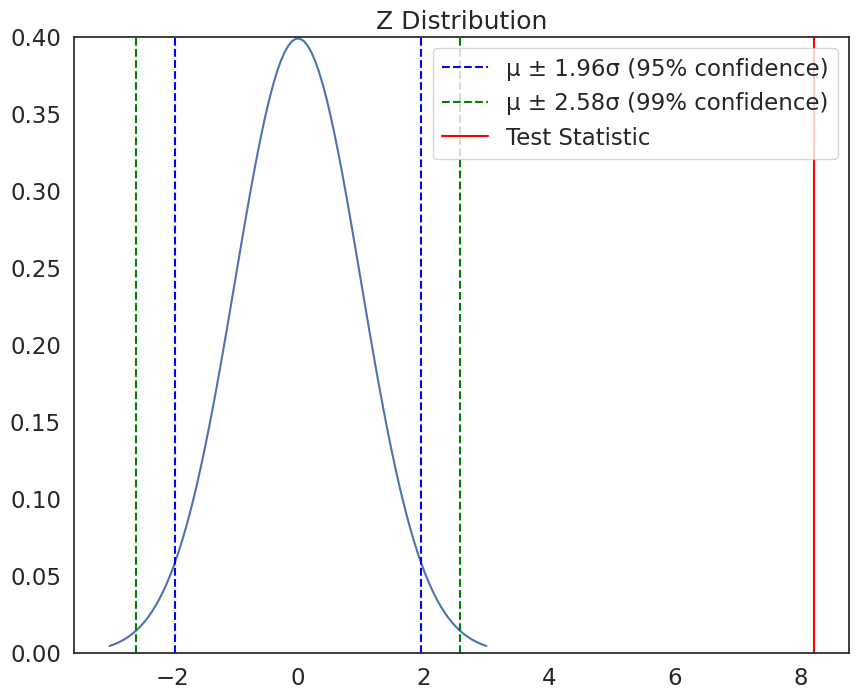

In [ ]:
t = manual_ttest(average_df['average_value'],df_lou['MEDLISPRIPERSQUFEELA'])
plot_z(t)

In [ ]:
from scipy import stats


t_stat, p_value = stats.ttest_ind(average_df['average_value'],df_lou['MEDLISPRIPERSQUFEELA'])

print("t-statistic:", t_stat)
print("P-value:", p_value)

t-statistic: 8.216310177207252
P-value: 2.4886982985264235e-14
